In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "retina"
from matplotlib import rcParams
rcParams['savefig.dpi'] = 550
rcParams['font.size'] = 20
plt.rc('font', family='serif')


In [3]:
import lsdb
from lsdb import lsdb_client
client = lsdb_client(dask_on_ray=True, num_workers=8)

2023-11-26 22:07:42,296	INFO worker.py:1673 -- Started a local Ray instance.


In [4]:
gaia = lsdb.read_hipscat("/data3/epyc/projects3/ivoa_demo/gaia/catalog")
ztf = lsdb.read_hipscat("/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_dr14")

#sources load takes a minute, since it creates a healpix alignment on load
ztf_sources = lsdb.read_hipscat("/data3/epyc/data3/hipscat/catalogs/ztf_axs/ztf_source")

In [5]:
gaia

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pm,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,nu_eff_used_in_astrometry,pseudocolour,pseudocolour_error,ra_pseudocolour_corr,dec_pseudocolour_corr,parallax_pseudocolour_corr,pmra_pseudocolour_corr,pmdec_pseudocolour_corr,astrometric_matched_transits,visibility_periods_used,astrometric_sigma5d_max,matched_transits,new_matched_transits,matched_transits_removed,ipd_gof_harmonic_amplitude,ipd_gof_harmonic_phase,ipd_frac_multi_peak,ipd_frac_odd_win,ruwe,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_bp_n_contaminated_transits,phot_bp_n_blended_transits,phot_rp_n_contaminated_transits,phot_rp_n_blended_transits,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_method_used,rv_nb_transits,rv_nb_deblended_transits,rv_visibility_periods_used,rv_expected_sig_to_noise,rv_renormalised_gof,rv_chisq_pvalue,rv_time_duration,rv_amplitude_robust,rv_template_teff,rv_template_logg,rv_template_fe_h,rv_atm_param_origin,vbroad,vbroad_error,vbroad_nb_transits,grvs_mag,grvs_mag_error,grvs_mag_nb_transits,rvs_spec_sig_to_noise,phot_variable_flag,l,b,ecl_lon,ecl_lat,in_qso_candidates,in_galaxy_candidates,non_single_star,has_xp_continuous,has_xp_sampled,has_rvs,has_epoch_photometry,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,in_andromeda_survey,classprob_dsc_combmod_quasar,classprob_dsc_combmod_galaxy,classprob_dsc_combmod_star,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,azero_gspphot,azero_gspphot_lower,azero_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,ebpminrp_gspphot,ebpminrp_gspphot_lower,ebpminrp_gspphot_upper,libname_gspphot,Norder,Npix,Dir
npartitions=3933,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,string,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,bool,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,int64,int64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,string,float64,float64,float64,float64,bool,bool,int64,bool,bool,bool,bool,bool,bool,bool,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,floa

## Cone Search FG Dwarfs in Gaia DR3 + ZTF

In [42]:
%%time
_sample = gaia.cone_search(
    ra=31,
    dec=3,
    radius=1,
).crossmatch(
    ztf
).query(
    "nobs_g_ztf_dr14 > 100 and nobs_r_ztf_dr14 > 100 and \
    parallax_gaia > 0 and parallax_over_error_gaia > 5 and \
    teff_gspphot_gaia > 5380 and teff_gspphot_gaia < 7220 and logg_gspphot_gaia > 4.5 and logg_gspphot_gaia < 4.72 and classprob_dsc_combmod_star_gaia > 0.5"
)

CPU times: user 213 ms, sys: 0 ns, total: 213 ms
Wall time: 208 ms


In [43]:
%%time
_sample = _sample.compute()

(dask:cone_filter-78fc505e-1391-43eb-83c4-3e417361b940 pid=103041) /astro/users/atzanida/lsdbgithub/lsdb/src/lsdb/core/cone_search.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
(dask:cone_filter-78fc505e-1391-43eb-83c4-3e417361b940 pid=103041)   data_frame["_CONE_SEP"] = df_separations


CPU times: user 567 ms, sys: 84.5 ms, total: 651 ms
Wall time: 5.79 s


In [44]:
_sample.head()

,solution_id_gaia,designation_gaia,source_id_gaia,random_index_gaia,ref_epoch_gaia,ra_gaia,ra_error_gaia,dec_gaia,dec_error_gaia,parallax_gaia,...,nobs_g_ztf_dr14,nobs_r_ztf_dr14,nobs_i_ztf_dr14,mean_mag_g_ztf_dr14,mean_mag_r_ztf_dr14,mean_mag_i_ztf_dr14,Norder_ztf_dr14,Dir_ztf_dr14,Npix_ztf_dr14,_DIST
_hipscat_index,,,,,,,,,,,,,,,,,,,,,
5016967103937249280,1636148068921376768,Gaia DR3 2508483556264219776,2508483556264219776,165813210,2016.0,31.069389,0.038773,2.055776,0.030771,0.768621,...,353,529,30,16.094430,15.611477,15.488429,3,0,278,0.000019
5016968461146914816,1636148068921376768,Gaia DR3 2508484479681898624,2508484479681898624,549373296,2016.0,30.959082,0.053667,2.104938,0.051832,0.377406,...,405,580,30,16.858399,16.399300,16.262396,3,0,278,0.000014
5016976080418897920,1636148068921376768,Gaia DR3 2508488194828871680,2508488194828871680,962247159,2016.0,30.827013,0.022198,2.030737,0.016263,1.464669,...,408,581,30,14.769503,14.286193,14.162462,3,0,278,0.000018
5016979619471949824,1636148068921376768,Gaia DR3 2508489809736604416,2508489809736604416,1345819256,2016.0,30.859555,0.021035,2.048168,0.016865,1.542407,...,408,581,30,14.795699,14.203904,14.043296,3,0,278,0.000015
5016980899372204032,1636148068921376768,Gaia DR3 2508490428211894016,2508490428211894016,1112691000,2016.0,30.872286,0.054787,2.080811,0.039953,0.438279,...,407,580,30,16.613310,16.209770,16.115396,3,0,278,0.000016


In [45]:
_sample_hips = lsdb.from_dataframe(
    _sample, 
    lowest_order=5, 
    highest_order=8, 
    set_hipscat_index=False, 
    ra_column="ra_gaia", 
    dec_column="dec_gaia", 
    threshold=1_000_000
)

In [46]:
_sample_sources = _sample_hips.join(
    ztf_sources, left_on="ps1_objid_ztf_dr14", right_on="ps1_objid"
).compute()

In [47]:
_sample_sources.keys()

Index(['solution_id_gaia', 'designation_gaia', 'source_id_gaia',
       'random_index_gaia', 'ref_epoch_gaia', 'ra_gaia', 'ra_error_gaia',
       'dec_gaia', 'dec_error_gaia', 'parallax_gaia',
       ...
       'catflags', 'fieldID', 'mag', 'magerr', 'mjd', 'rcID', 'band', 'Norder',
       'Dir', 'Npix'],
      dtype='object', length=194)

In [48]:
np.unique(_sample_sources.index.values)[0:77] # unique source ID's

array([5016967103937249280, 5016968461146914816, 5016976080418897920,
       5016979619471949824, 5016980899372204032, 5016980912257105920,
       5016982922301800448, 5016992482899001344, 5017000351279087616,
       5017003997706321920, 5017004504512462848, 5017008507421982720,
       5017009259041259520, 5022954868168458240, 5023000034044542976,
       5023009388483313664, 5023014198846685184, 5023022264795267072,
       5023028960649281536, 5023175560767995904, 5023188505799426048,
       5023577217519583232, 5028881175712628736, 5028898188078088192,
       5028950702643216384, 5028976042950262784, 5028982360847155200,
       5028985083856420864, 5028985526238052352, 5028996272246226944,
       5028997483427004416, 5029012429913194496, 5029042262756032512,
       5029105368710512641, 5029111755326881792, 5029289713001824256,
       5029294038033891328, 5029295317934145536, 5035083233042104320,
       5035088850859327488, 5035101791595790336, 5035114629253038080,
       5035145114930

In [49]:
_sample_sources[_sample_sources.index==5029289713001824256].head()

,solution_id_gaia,designation_gaia,source_id_gaia,random_index_gaia,ref_epoch_gaia,ra_gaia,ra_error_gaia,dec_gaia,dec_error_gaia,parallax_gaia,...,catflags,fieldID,mag,magerr,mjd,rcID,band,Norder,Dir,Npix
_hipscat_index,,,,,,,,,,,,,,,,,,,,,
5029289713001824256,1636148068921376768,Gaia DR3 2514645150706682624,2514645150706682624,1137537855,2016.0,31.810066,0.050934,2.8941,0.047924,0.448214,...,0,451,16.439039,0.015528,58779.42545,26,r,6,10000,17867
5029289713001824256,1636148068921376768,Gaia DR3 2514645150706682624,2514645150706682624,1137537855,2016.0,31.810066,0.050934,2.8941,0.047924,0.448214,...,0,451,16.403702,0.015369,59276.11917,26,r,6,10000,17867
5029289713001824256,1636148068921376768,Gaia DR3 2514645150706682624,2514645150706682624,1137537855,2016.0,31.810066,0.050934,2.8941,0.047924,0.448214,...,-32768,451,16.316109,0.015002,58781.34461,26,r,6,10000,17867
5029289713001824256,1636148068921376768,Gaia DR3 2514645150706682624,2514645150706682624,1137537855,2016.0,31.810066,0.050934,2.8941,0.047924,0.448214,...,0,451,16.442694,0.015545,58781.34048,26,r,6,10000,17867
5029289713001824256,1636148068921376768,Gaia DR3 2514645150706682624,2514645150706682624,1137537855,2016.0,31.810066,0.050934,2.8941,0.047924,0.448214,...,0,451,16.401873,0.015360,58781.29333,26,r,6,10000,17867


In [50]:
def fetch_lc(hips_id, table=_sample_sources, band='r'):
    """This function fetches the light curve for a given hips_id and band.
    
    Parameters
    ----------
    hips_id : int
    band (str): photometric band (default='r')

    Returns
    -------
    light curve table for a given band 
    """
    one_object = table.query(f"_hipscat_index == {hips_id}")

    if band=='r':
        one_object_rband = one_object.query("band == \"r\"")
        cat = one_object_rband['catflags'] != -32768 
        return one_object_rband["mjd"][cat], one_object_rband["mag"][cat], one_object_rband["magerr"][cat]

    elif band=='g':
        one_object_gband = one_object.query("band == \"g\"")
        cat = one_object_gband['catflags'] != -32768 
        return one_object_gband["mjd"][cat], one_object_gband["mag"][cat], one_object_gband["magerr"][cat]

    elif band=='i':
        one_object_iband = one_object.query("band == \"i\"")
        return one_object_iband["mjd"], one_object_iband["mag"], one_object_iband["magerr"]

    elif band=='all':
        one_object_rband = one_object.query("band == \"r\"")
        one_object_gband = one_object.query("band == \"g\"")
        one_object_iband = one_object.query("band == \"i\"")

        gband_mjd, gband_mag, gband_magerr = one_object_gband["mjd"], one_object_gband["mag"], one_object_gband["magerr"]
        rband_mjd, rband_mag, rband_magerr = one_object_rband["mjd"], one_object_rband["mag"], one_object_rband["magerr"]
        iband_mjd, iband_mag, iband_magerr = one_object_iband["mjd"], one_object_iband["mag"], one_object_iband["magerr"]


        return gband_mjd, gband_mag, gband_magerr, rband_mjd, rband_mag, rband_magerr, iband_mjd, iband_mag, iband_magerr

Text(0.5, 0, 'Time [MJD]')

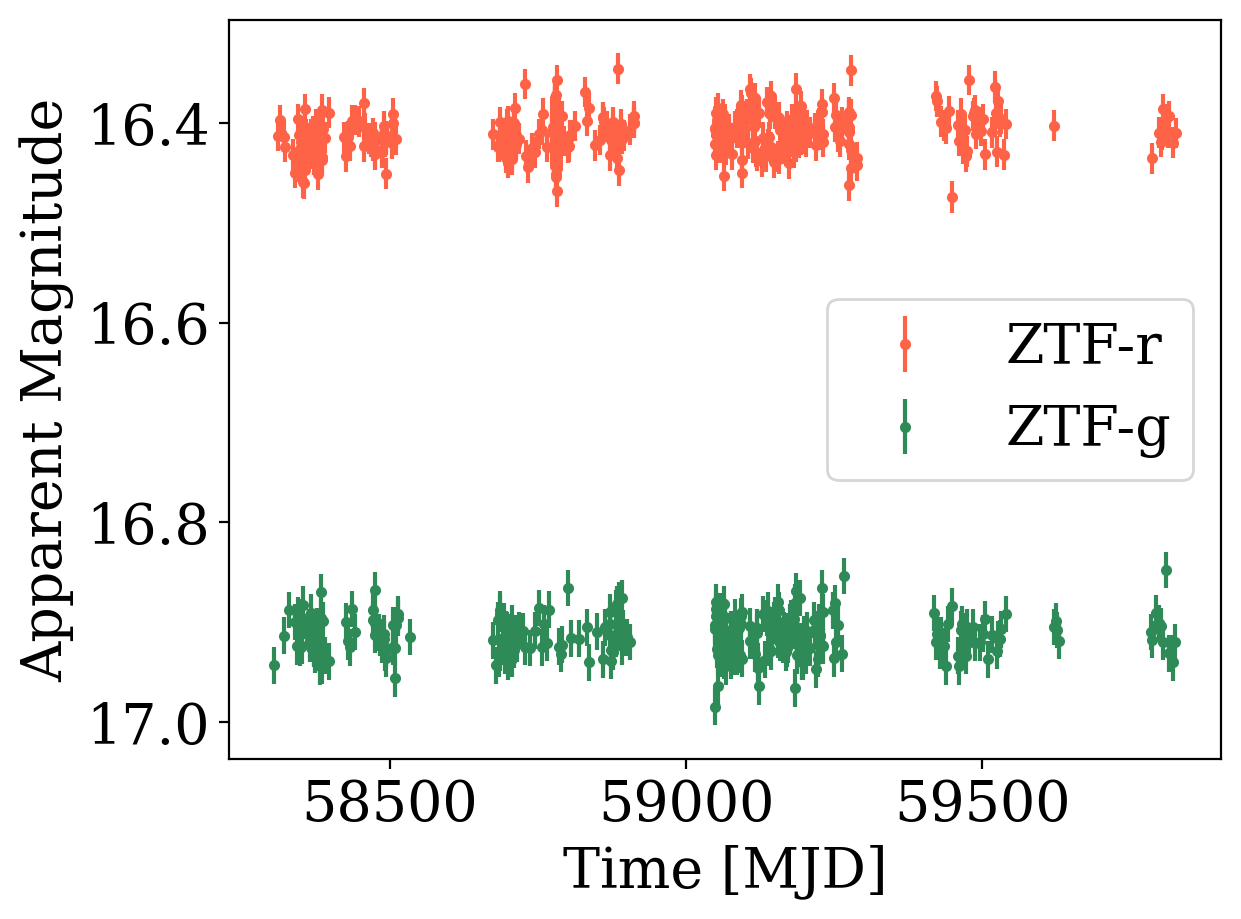

In [52]:
# random sourceID
rnd = 5029289713001824256

#TODO

lc_r = fetch_lc(rnd, band='r')
lc_g = fetch_lc(rnd, band='g')
plt.errorbar(*lc_r, fmt='.', color='tomato', label='ZTF-r')
plt.errorbar(*lc_g, fmt='.', color='seagreen', label='ZTF-g')
plt.ylim(plt.ylim()[::-1])
plt.legend()
plt.ylabel("Apparent Magnitude")
plt.xlabel("Time [MJD]")